# **Iris Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [ ]:
iris_df = pd.read_csv("iris.csv")

X = iris_df.drop('species', axis=1)
y = iris_df['species']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Accuracy with 10 trees:", accuracy_score(y_test, y_pred))

Random Forest Accuracy with 10 trees: 1.0


Best Random Forest Accuracy: 1.0000 with 1 trees


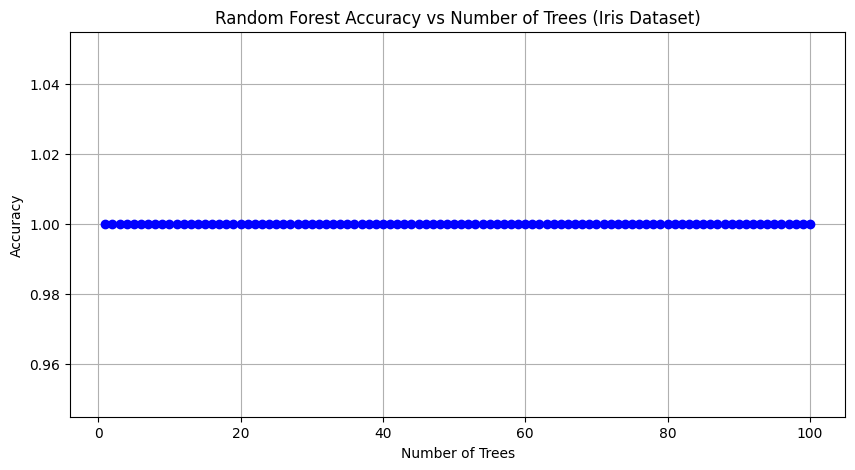

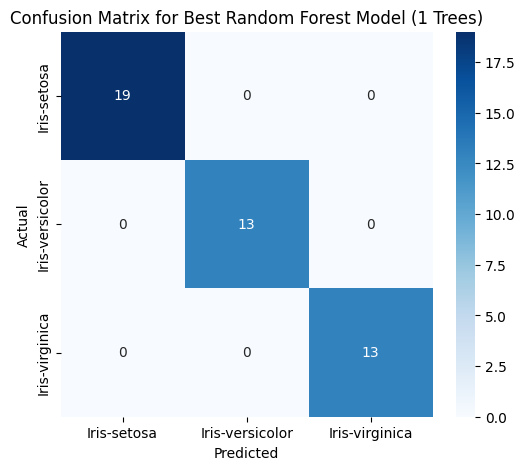

In [18]:
scores = []
n_range = range(1, 101)
best_model = None
best_preds = None

for n in n_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    scores.append(acc)

    if acc == max(scores):
        best_model = model
        best_preds = preds

best_score = max(scores)
best_n = n_range[scores.index(best_score)]

print(f"Best Random Forest Accuracy: {best_score:.4f} with {best_n} trees")

plt.figure(figsize=(10, 5))
plt.plot(n_range, scores, marker='o', linestyle='-', color='blue')
plt.title('Random Forest Accuracy vs Number of Trees (Iris Dataset)')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

cm = confusion_matrix(y_test, best_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix for Best Random Forest Model ({best_n} Trees)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()